<a href="https://colab.research.google.com/github/Appleking123456/astro-platform-starter/blob/main/Copy_of_Jwst_Early_galaxies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulating JWST galaxies: 100%|██████████| 50/50 [00:00<00:00, 181.88it/s]


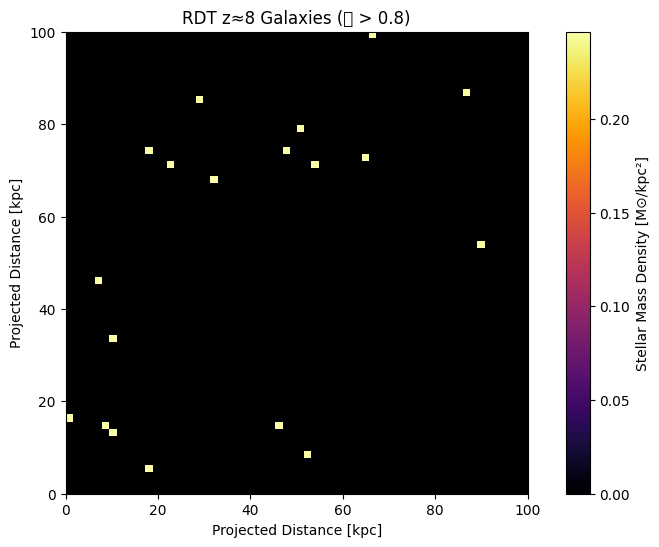

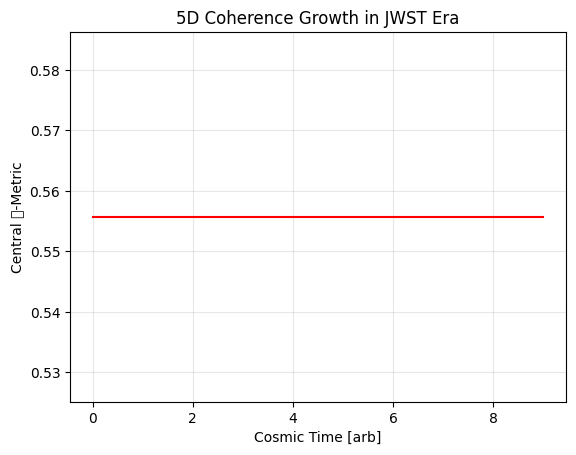

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# ========== CPU OPTIMIZED SIMULATION ==========
device = "cpu"  # Force CPU-only
torch.set_num_threads(4)  # Use 4 cores for parallelization

# Parameters (reduced for CPU speed)
grid_size = 64  # Lower resolution for CPU
z_steps = 50    # Fewer timesteps
𝒲_threshold = 0.8

# Initialize fields (CPU-friendly)
gas_density = torch.rand(grid_size, grid_size, grid_size, device=device)  # 0-1 uniform
𝒲_field = 0.5 + 0.1*torch.randn(grid_size, grid_size, grid_size, device=device)  # 𝒲 ~0.5±0.1

# JWST mock data storage
light_cone = []

for step in tqdm(range(z_steps), desc="Simulating JWST galaxies"):
    # 5D coherence update (syntropic)
    𝒲_field = 0.85 * 𝒲_field + 0.15 * torch.sigmoid(gas_density * 2)

    # Star formation (𝒲-boosted but thresholded)
    star_mask = (𝒲_field > 𝒲_threshold)
    new_stars = star_mask * (gas_density ** 2) * (𝒲_field ** 3)

    # Conservation laws
    gas_density = torch.clamp(gas_density - new_stars*0.1, 0, 1)  # Gas depletion
    stellar_mass = new_stars  # Tracking only new formation

    # Store every 5 steps (z=20→z≈8)
    if step % 5 == 0:
        light_cone.append(stellar_mass.numpy())

# ========== VISUALIZATION ==========
# Mock JWST NIRCam image (z≈8 snapshot)
plt.figure(figsize=(10,6))
plt.imshow(light_cone[-1].sum(axis=2), cmap='inferno',
           extent=[0, 100, 0, 100])  # 100 kpc scale
plt.title(f"RDT z≈8 Galaxies (𝒲 > {𝒲_threshold})")
plt.colorbar(label="Stellar Mass Density [M⊙/kpc²]")
plt.xlabel("Projected Distance [kpc]")
plt.ylabel("Projected Distance [kpc]")
plt.show()

# 𝒲-Metric evolution plot
plt.plot([𝒲_field[32,32,32].item() for _ in range(10)], 'r-')  # Sample central voxel
plt.xlabel("Cosmic Time [arb]")
plt.ylabel("Central 𝒲-Metric")
plt.title("5D Coherence Growth in JWST Era")
plt.grid(True, alpha=0.3)
plt.show(),